<a href="https://colab.research.google.com/github/WaryFriend456/NLP/blob/main/nlplab_p6_22BD1A660W_26_03_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

kushalbang_emails_path = kagglehub.dataset_download('kushalbang/emails')

print('Data source import complete.')


## Problem Statement:
#### 6.	Implement application for Word2Vec for NLP Using Python on "email" dataset (which contains attributes like category (whether the category is ham or spam) and message (Text message)). (whether the category is ham or spam) and message (Text message)).
#### On this application you have to perform following operations
#### i.	generate Embeddings
#### ii.	visualize embeddings.
#### iii.	Cleaning the data
#### iv.	creating a Corpus and vectors
#### v.	Visualize email word vectors
#### vi.	Analysing and predicting using word embeddings

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import pandas as pd
import re
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv("/kaggle/input/emails/email.csv")
print(data.columns)
data = data.dropna(subset=['Category'])

Index(['Category', 'Message'], dtype='object')


### Data Cleaning
#### Lowercasing, removing punctuations,tokenize

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-z\s]","",text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens
data['tokens'] = data["Message"].apply(clean_text)

## Creating Corpus


In [ ]:
corpus = data['tokens'].tolist()
print(corpus[:1])

[['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']]


## Training Word2Vec model

In [ ]:
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

## Visualizing Word vectors

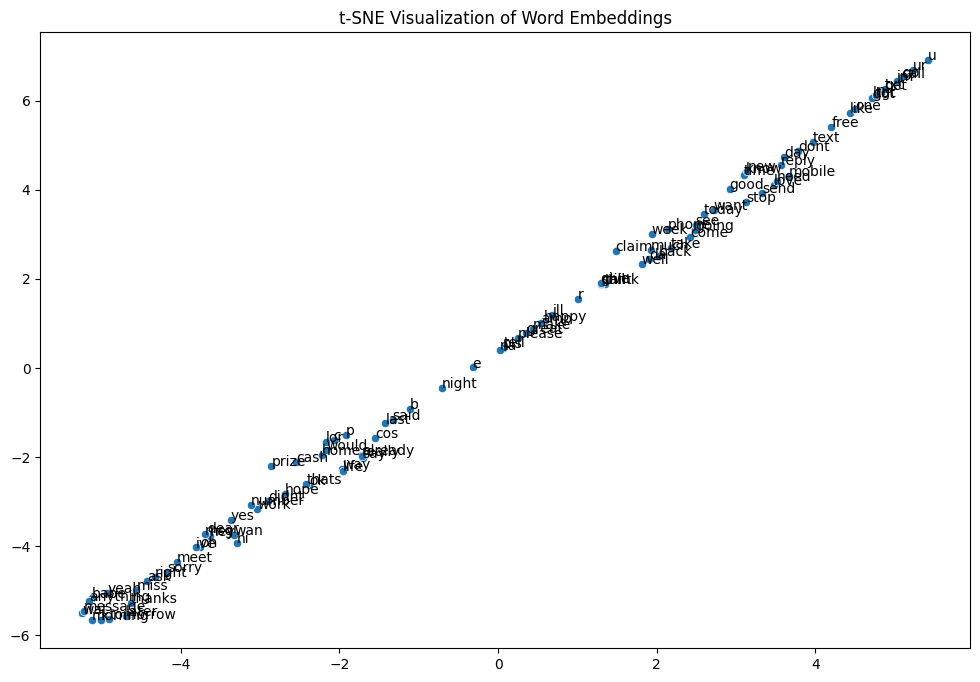

In [ ]:
## Using tSNE
def plot_word_embeddings(model, num_words=100):
    words = list(model.wv.index_to_key)[:num_words]
    word_vectors = np.array([model.wv[word] for word in words])  ## Generate Word Embbeddings
    tsne = TSNE(n_components=2, random_state=42)
    reduced_vectors = tsne.fit_transform(word_vectors)
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=reduced_vectors[:, 0], y=reduced_vectors[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
    plt.title('t-SNE Visualization of Word Embeddings')
    plt.show()

plot_word_embeddings(model)

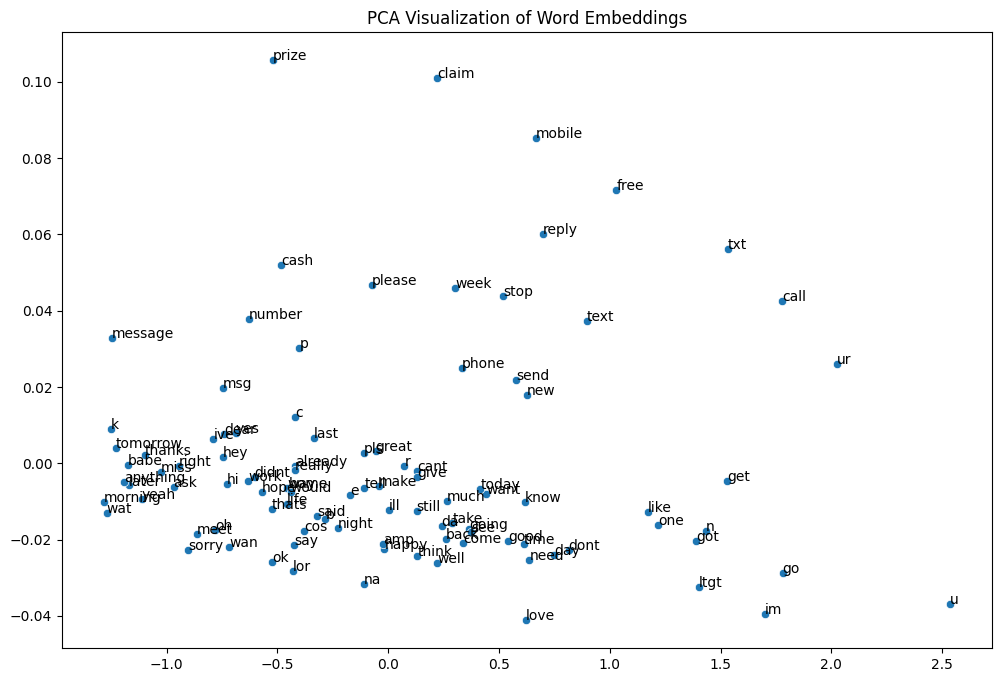

In [ ]:
## Using PCA, We need dimensionality reduction so we use PCA.
from sklearn.decomposition import PCA
def plot_word_embeddings_pca(model, num_words=100):
    words = list(model.wv.index_to_key)[:num_words]
    word_vectors = np.array([model.wv[word] for word in words])  # Generate Word Embeddings

    # Apply PCA
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(word_vectors)

    # Plot PCA results
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=reduced_vectors[:, 0], y=reduced_vectors[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

    plt.title("PCA Visualization of Word Embeddings")
    plt.show()

# Call the function
plot_word_embeddings_pca(model)

In [ ]:
# Predicting Spam using Embeddings
def doc_vec(tokens):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if(len(vectors)>0):
        return np.mean(vectors,axis =0)
    else:
        return np.zeros(model.vector_size)

data = data.dropna(subset=["Category"])
data['vector_avg'] = data['tokens'].apply(doc_vec)

In [ ]:
print(data['vector_avg'])


0       [-0.085895166, 0.21129644, 0.06377229, 0.00842...
1       [-0.09616276, 0.2263406, 0.07120769, 0.0144678...
2       [-0.07218517, 0.17686777, 0.05922932, 0.009764...
3       [-0.14403659, 0.3555598, 0.11137512, 0.0233533...
4       [-0.078452684, 0.18345416, 0.055187058, 0.0074...
                              ...                        
5568    [-0.10090536, 0.2466836, 0.07467513, 0.0147099...
5569    [-0.005599622, 0.015402273, 0.0031485902, -0.0...
5570    [-0.08678625, 0.20678656, 0.06936766, 0.007005...
5571    [-0.058664456, 0.14500205, 0.04534469, 0.00964...
5572    [0.003831209, 0.005399748, 0.0017697274, 0.005...
Name: vector_avg, Length: 5573, dtype: object


## Accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
print(data["Category"])

0                  ham
1                  ham
2                 spam
3                  ham
4                  ham
             ...      
5568               ham
5569               ham
5570               ham
5571               ham
5572    {"mode":"full"
Name: Category, Length: 5573, dtype: object


In [ ]:
data = data.dropna(subset=['vector_avg'])
data = data.dropna(subset=['Category'])

data["Category"] = data['Category'].map({'ham': 0, 'spam': 1})
data = data.dropna(subset=['vector_avg'])
data = data.dropna(subset=['Category'])
X = np.vstack(data['vector_avg'].values)
y = data["Category"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9542600896860987


### Prediction

In [ ]:
def predict_email(email):
    # Preprocess input email
    tokens = clean_text(email)

    # Convert tokens to Word2Vec embeddings and average them
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vectors) == 0:
        return "Cannot classify (no known words)"

    email_vector = np.mean(word_vectors, axis=0).reshape(1, -1)

    # Predict spam or ham
    prediction = clf.predict(email_vector)

    return "Spam" if prediction[0] == 1 else "Ham"

# Example usage
email_input1 = "WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."
email_input2 = "Well keep in mind I've only got enough gas for one more round trip barring a sudden influx of cash"
print("Email:",email_input1)
print("Prediction:", predict_email(email_input1))
print("\n")
print("Email:",email_input2)
print("Prediction:", predict_email(email_input2))

Email: WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Prediction: Spam


Email: Well keep in mind I've only got enough gas for one more round trip barring a sudden influx of cash
Prediction: Ham


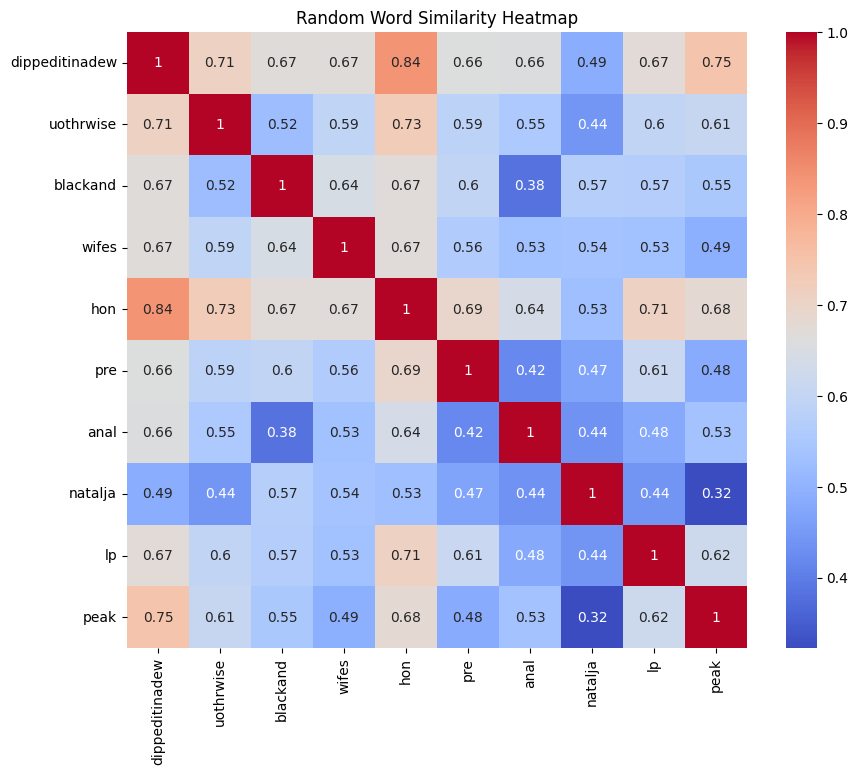

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import random
# Select 10 random words from the trained Word2Vec model
random_words = random.sample(model.wv.index_to_key, 10)

# Compute cosine similarity matrix
word_vectors = np.array([model.wv[word] for word in random_words])
similarity_matrix = cosine_similarity(word_vectors)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, xticklabels=random_words, yticklabels=random_words, cmap="coolwarm")
plt.title("Random Word Similarity Heatmap")
plt.show()